In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Introducing Data

In [6]:
# Import data frame dan mengubah isi columns
df = pd.read_csv('dataset_rumah_dps.csv', usecols=['harga','l_tanah','l_bangunan','total_kamar','total_toilet','garasi'])

In [8]:
# Melihat 10 baris data teratas
df.head(10)

,harga,l_tanah,l_bangunan,total_kamar,total_toilet,garasi
0,235000000,50,30,2,1,1
1,270000000,60,36,2,1,1
2,240000000,125,100,3,2,0
3,295000000,60,36,2,1,1
4,280000000,60,36,2,1,1
5,295000000,70,36,2,1,0
6,270000000,80,35,2,1,0
7,295000000,60,30,2,1,1
8,275000000,87,50,2,1,0
9,200000000,72,36,2,1,0


Penjelasan kolom dari tabel:

    1. Harga = Harga rumah (Rp)
    2. l_tanah = Luas Tanah
    3. l_bangunan = Luas Bangunan
    4. total_kamar = Total kamar tidur (/rumah)
    5. total_toilet = Total kamar mandi (/rumah)
    6. garasi = Total garasi (/rumah)

In [9]:
# Total jumlah baris dan kolom data
df.shape

(210, 6)

In [12]:
# Informasi tipe data setiap variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   harga         210 non-null    int64
 1   l_tanah       210 non-null    int64
 2   l_bangunan    210 non-null    int64
 3   total_kamar   210 non-null    int64
 4   total_toilet  210 non-null    int64
 5   garasi        210 non-null    int64
dtypes: int64(6)
memory usage: 10.0 KB


In [15]:
# Melihat statistik data mencakup mean, kuartil, standar deviation, max dls
df.describe()

,harga,l_tanah,l_bangunan,total_kamar,total_toilet,garasi
count,2.100000e+02,210.000000,210.000000,210.000000,210.000000,210.00000
mean,1.096821e+09,282.219048,144.890476,2.752381,1.680952,1.20000
std,7.423124e+08,455.552002,153.998858,1.200327,0.977312,0.86837
min,1.500000e+08,45.000000,30.000000,1.000000,0.000000,0.00000
25%,4.800000e+08,80.000000,50.000000,2.000000,1.000000,1.00000
50%,9.500000e+08,111.000000,78.000000,2.000000,1.000000,1.00000
75%,1.605659e+09,424.500000,177.750000,3.000000,2.000000,2.00000
max,2.980636e+09,5700.000000,788.000000,7.000000,6.000000,3.00000


In [16]:
# Memeriksa missing values atau data ganda
df.isnull().sum()

harga           0
l_tanah         0
l_bangunan      0
total_kamar     0
total_toilet    0
garasi          0
dtype: int64

# Exploratory Data Analysis (EDA)

In [19]:
# Memeriksa kembali data 5 baris teratas dari data
df.head()

,harga,l_tanah,l_bangunan,total_kamar,total_toilet,garasi
0,235000000,50,30,2,1,1
1,270000000,60,36,2,1,1
2,240000000,125,100,3,2,0
3,295000000,60,36,2,1,1
4,280000000,60,36,2,1,1


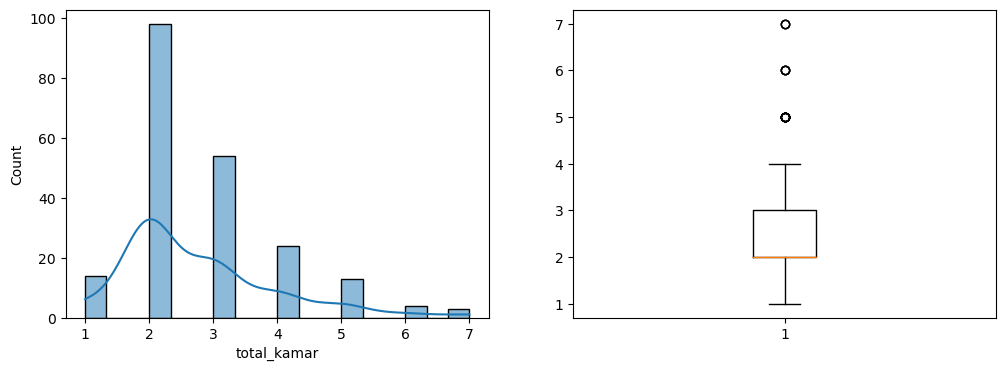

In [45]:
# Melihat distribusi dari Kamar Tidur
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.histplot(df['total_kamar'], kde=True)

f.add_subplot(1,2,2)
plt.boxplot(df['total_kamar'])
plt.show()

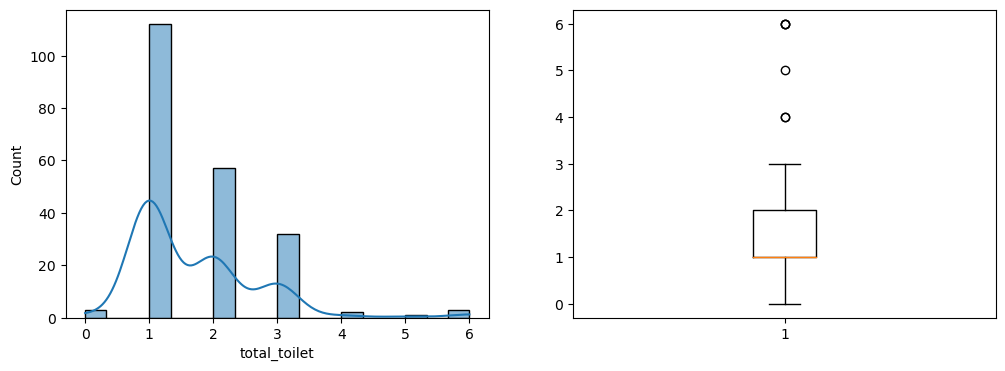

In [46]:
# Melihat distribusi dari Toilet
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.histplot(df['total_toilet'], kde=True)

f.add_subplot(1,2,2)
plt.boxplot(df['total_toilet'])
plt.show()

<Axes: xlabel='garasi', ylabel='Count'>

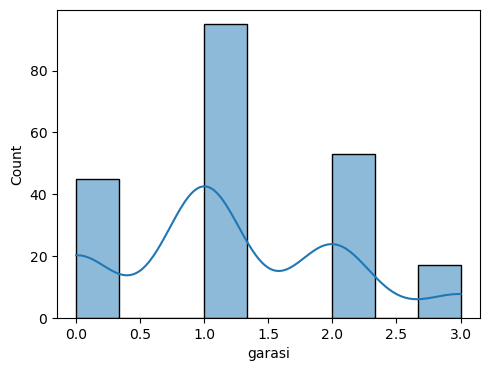

In [48]:
# Melihat distribusi dari Toilet
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.histplot(df['garasi'], kde=True)

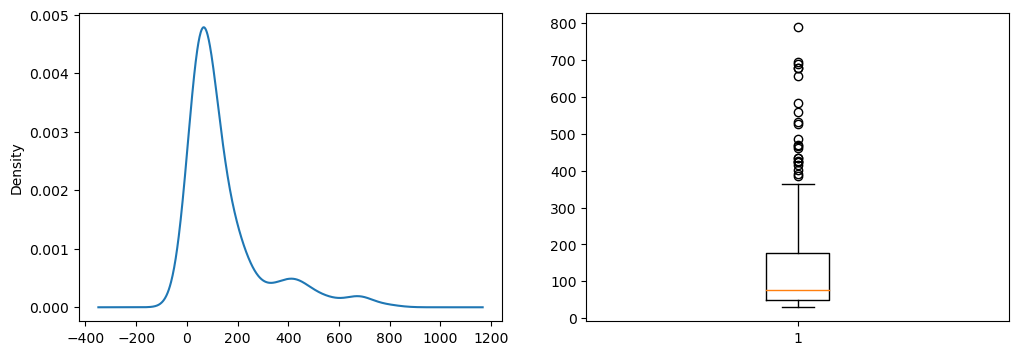

In [32]:
# Melihat distribusi dari Luas Tanah
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['l_bangunan'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['l_bangunan'])
plt.show()

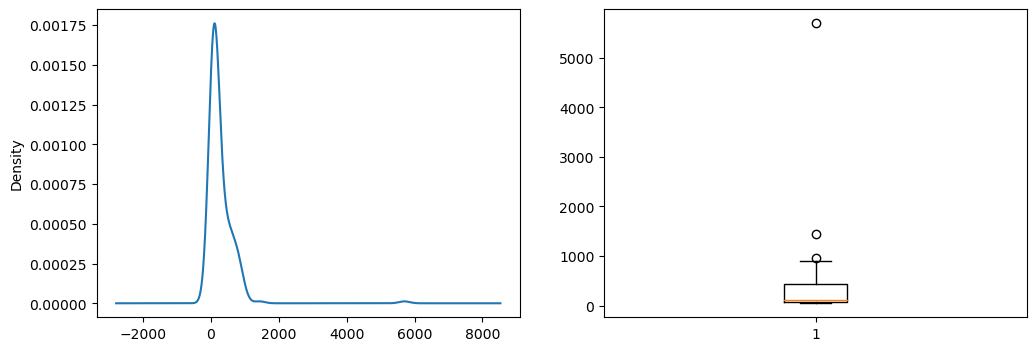

In [47]:
# Melihat distribusi dari Luas Tanah
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['l_tanah'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['l_tanah'])
plt.show()

C:\Users\rioagastya\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

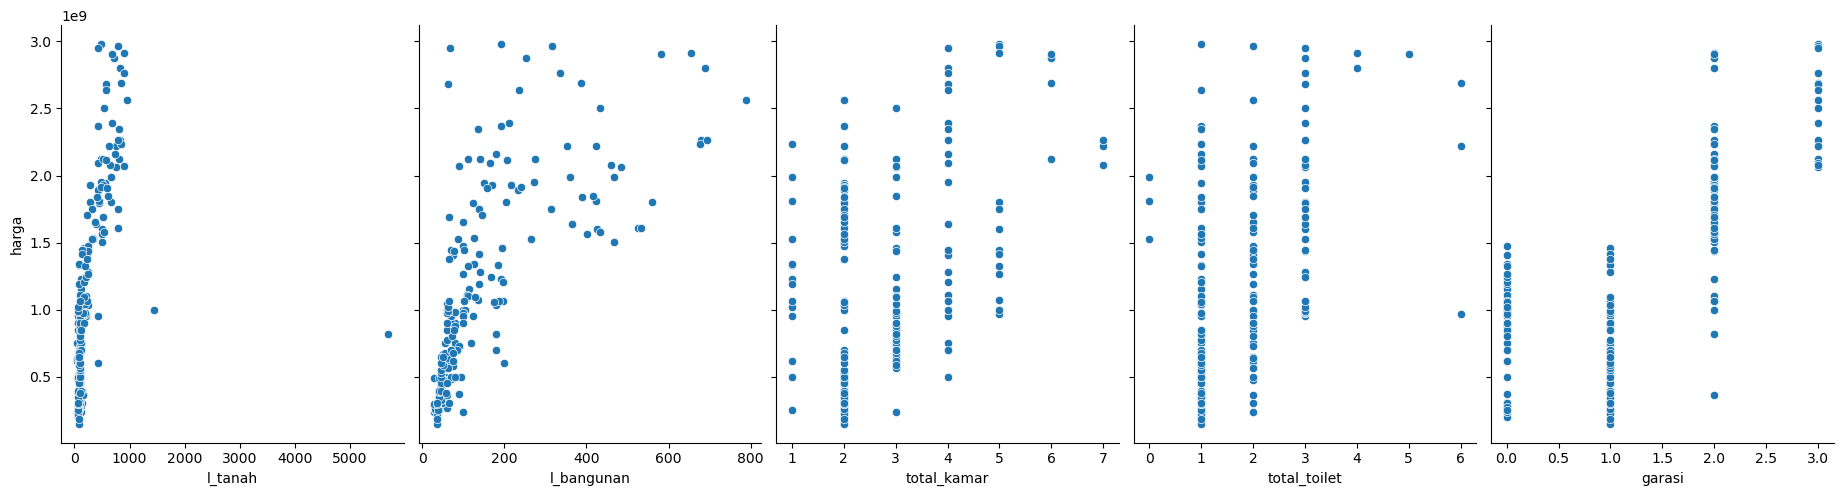

In [50]:
# Melihat hubungan antara independent dan dependent
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['l_tanah', 'l_bangunan', 'total_kamar', 'total_toilet', 'garasi'], y_vars=['harga'], size=5, aspect=0.75)
plt.show()

In [51]:
# Mengetahui nilai korelasi/hubungan dari independent variable dan dependent variable
df.corr().style.background_gradient().set_precision(2)

C:\Users\rioagastya\AppData\Local\Temp\ipykernel_7624\674520877.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,harga,l_tanah,l_bangunan,total_kamar,total_toilet,garasi
harga,1.00,0.44,0.72,0.48,0.51,0.73
l_tanah,0.44,1.00,0.45,0.27,0.20,0.45
l_bangunan,0.72,0.45,1.00,0.35,0.38,0.58
total_kamar,0.48,0.27,0.35,1.00,0.57,0.28
total_toilet,0.51,0.20,0.38,0.57,1.00,0.33
garasi,0.73,0.45,0.58,0.28,0.33,1.00


# Data Modeling

In [55]:
# Membuta variabel x dan y
X = df[['l_tanah', 'l_bangunan', 'total_kamar', 'total_toilet',
       'garasi']]
y = df['harga']

In [57]:
# Split menjadi training dan testing rasio 60:40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [59]:
# Cek shape dari data training dan testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(126, 5)
(126,)
(84, 5)
(84,)


In [61]:
# Membuat objek linear regresi
lin_reg = LinearRegression()

In [63]:
#  train model untuk data yang sudah displit
lin_reg.fit(X_train, y_train)

LinearRegression()

In [67]:
# Mencari nilai slope/koefisien (m) dan intercept (b)
coef_dict = {
    'features': X.columns,
    'coef_value': lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,l_tanah,2.214672e+06
1,l_bangunan,1.689611e+05
2,total_kamar,4.258900e+07
3,total_toilet,8.312003e+07
4,garasi,7.049905e+07


Dari nilai m dan b diatas, kalau dimasukan kedalam rumus menjadi: Y = 2.214672e+06+1.689611e+05+4.258900e+07+8.312003e+07+7.049905e+07

In [68]:
y_pred = lin_reg.predict(X_test)

In [70]:
# Mencari akurasi dari model
lin_reg.score(X_test, y_test)

-2.940854691708346

# Prediction

Prediksi harga rumah dengan kriteria berikut:

    1. Luas Tanah = 154
    2. Luas Bangunan = 300
    3. Kamar Tidur = 4
    4. Toilet = 2
    5. Garasi = 3

In [75]:
# Prediksi
lin_reg.predict([[154,300,4,2,3]])

C:\Users\rioagastya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.12514587e+09])

Perkiraan harga rumah di Bali dengan kriteria diatas berkisar Rp. 1.125.145.870.